# Membership Loyalty Engagement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
data_path_1 = 'data\Customer Flight Activity.csv'
data_path_2 = 'data\Customer Loyalty History.csv'

df_flight = pd.read_csv(data_path_1)
df_customer = pd.read_csv(data_path_2)

In [29]:
df_loyalty = df_flight.merge(df_customer,on='Loyalty Number',how='left')
df_loyalty = df_loyalty[['Loyalty Card','CLV','Enrollment Type','Enrollment Year','Enrollment Month','Cancellation Month',
                         'Cancellation Year','Points Accumulated', 'Points Redeemed', 'Month','Year']]

In [30]:
df_loyalty.head()

,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Month,Cancellation Year,Points Accumulated,Points Redeemed,Month,Year
0,Aurora,7919.20,Standard,2016,8,NaN,NaN,152.0,0,1,2017
1,Nova,2887.74,Standard,2013,3,NaN,NaN,203.0,0,1,2017
2,Nova,2838.07,Standard,2016,7,NaN,NaN,120.0,0,1,2017
3,Star,4170.57,Standard,2015,8,NaN,NaN,0.0,0,1,2017
4,Star,6622.05,Standard,2014,1,NaN,NaN,0.0,0,1,2017


In [8]:
df_loyalty.columns

Index(['Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Enrollment Year', 'Cancellation Month',
       'Cancellation Year', 'Points Accumulated', 'Points Redeemed', 'Month',
       'Year'],
      dtype='object')

In [12]:
df_loyalty['Points Redeemed'].value_counts(normalize=True)*100

Points Redeemed
0      94.038568
447     0.025393
523     0.024653
443     0.024160
516     0.023914
         ...    
834     0.000247
858     0.000247
862     0.000247
869     0.000247
859     0.000247
Name: proportion, Length: 587, dtype: float64

<AxesSubplot: xlabel='Month', ylabel='Points Redeemed'>

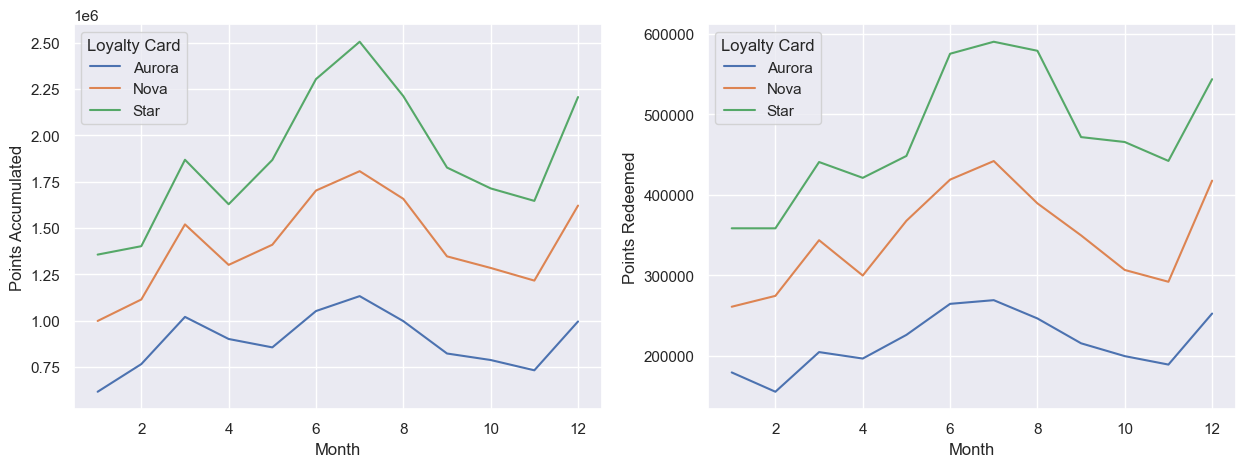

In [ ]:
### Points accumulated/redeemed over time based on Card type

df_card = df_loyalty[['Loyalty Card','Month','Points Accumulated', 'Points Redeemed']]
df_card = df_card.groupby(['Month','Loyalty Card']).sum().reset_index()

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(data=df_card,x='Month',y='Points Accumulated',hue='Loyalty Card')

plt.subplot(122)
sns.lineplot(data=df_card,x='Month',y='Points Redeemed',hue='Loyalty Card')

<AxesSubplot: xlabel='CLV', ylabel='Points Redeemed'>

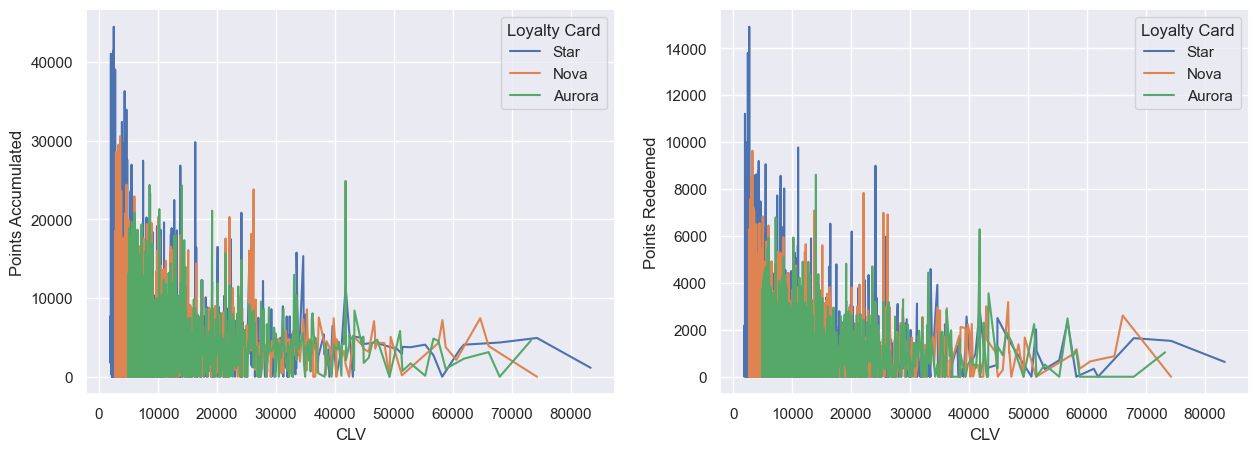

In [19]:
### Points accumulated/redemmed over CLV

df_clv = df_loyalty[['CLV','Loyalty Card','Points Accumulated', 'Points Redeemed']]
df_clv = df_clv.groupby(['CLV','Loyalty Card']).sum().reset_index()

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(data=df_clv,x='CLV',y='Points Accumulated',hue='Loyalty Card')

plt.subplot(122)
sns.lineplot(data=df_clv,x='CLV',y='Points Redeemed',hue='Loyalty Card')

<AxesSubplot: xlabel='Month', ylabel='Points Accumulated'>

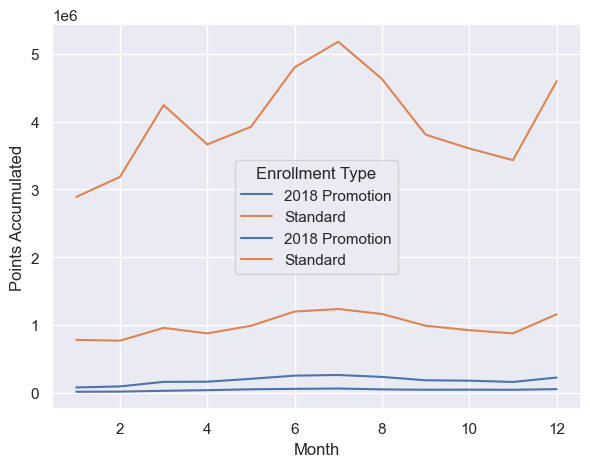

In [22]:
### Points accumulated/redeemed over time based on Enrollment Type

df_et = df_loyalty[['Enrollment Type','Month','Points Accumulated', 'Points Redeemed']]
df_et = df_et.groupby(['Month','Enrollment Type']).sum().reset_index()

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(data=df_et,x='Month',y='Points Accumulated',hue='Enrollment Type')

plt.subplot(121)
sns.lineplot(data=df_et,x='Month',y='Points Redeemed',hue='Enrollment Type')

<AxesSubplot: xlabel='Month', ylabel='Points Redeemed'>

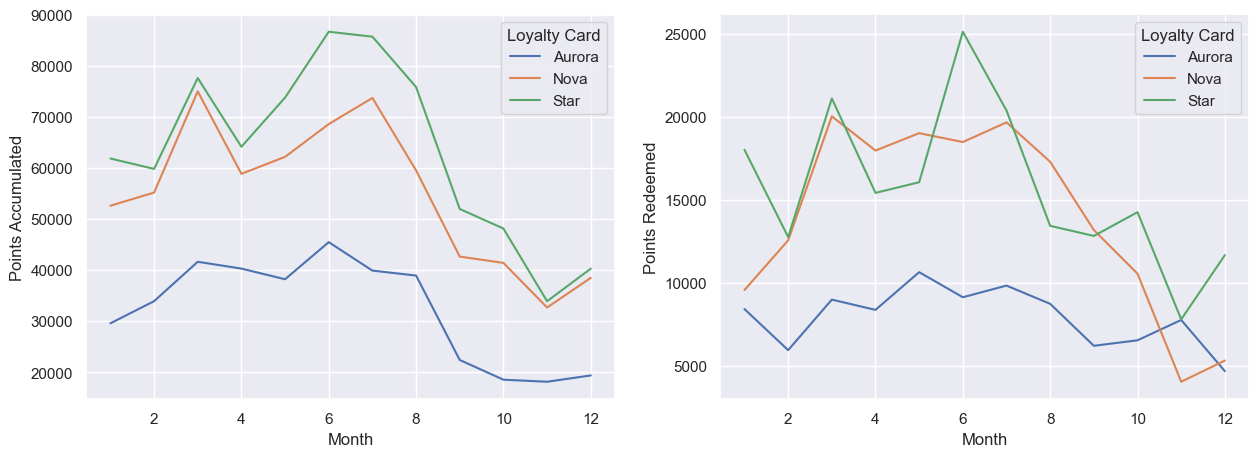

In [23]:
### Points accumulated/redeemed over time for cancelled users (vs current users)

df_cancelled = df_loyalty[df_loyalty['Cancellation Year'].notna()]

df_card = df_cancelled[['Loyalty Card','Month','Points Accumulated', 'Points Redeemed']]
df_card = df_card.groupby(['Month','Loyalty Card']).sum().reset_index()

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(data=df_card,x='Month',y='Points Accumulated',hue='Loyalty Card')

plt.subplot(122)
sns.lineplot(data=df_card,x='Month',y='Points Redeemed',hue='Loyalty Card')

<AxesSubplot: xlabel='Enrollment Year', ylabel='Points Accumulated'>

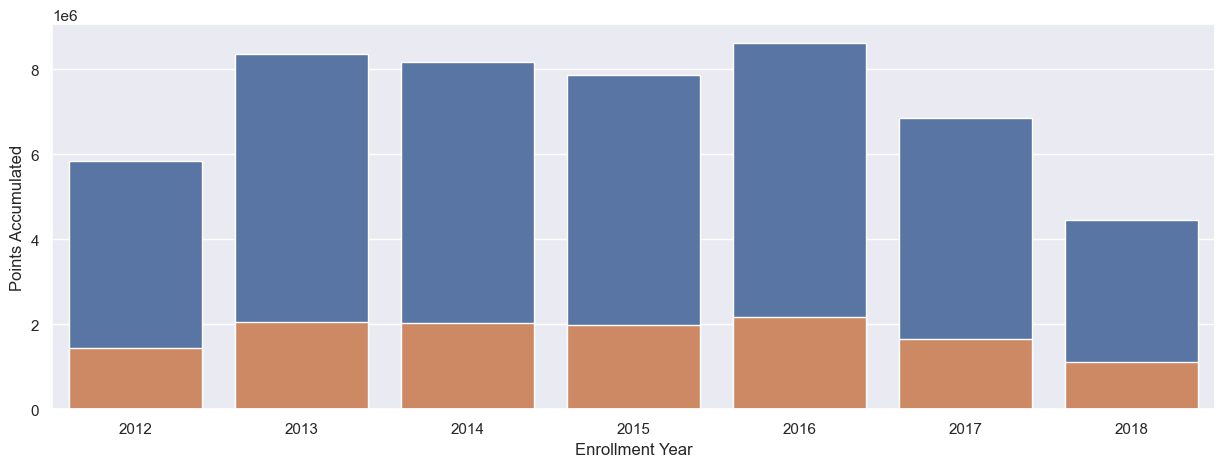

In [46]:
### Point accumulated based on the year customer enrolled

df_year = df_loyalty[['Enrollment Year','Points Accumulated', 'Points Redeemed']]
df_year = df_year.groupby('Enrollment Year').sum().reset_index()

plt.figure(figsize=(15,5))

sns.barplot(data=df_year,x='Enrollment Year',y='Points Accumulated')
sns.barplot(data=df_year,x='Enrollment Year',y='Points Redeemed')

In [ ]:
### Ratio of accumulated to redeemed based on Card Type, Enrollment Type, Cancelled Users

